<h1> Addition using Gated Recurrent Unit Cell </h1>

In [1]:
# import libraries
import numpy as np
import tensorflow as tf
from keras.layers import GRU, Dense, Dropout, Embedding, Reshape, Input
from keras.models import Sequential, Model
from keras.callbacks import TensorBoard
from IPython.core.display import Image

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Build model by adding layers
a = Input(shape=(1,2))
b = GRU(100)(a)
c= Dense(1)(b)

model = Model(inputs=a, outputs=c)

In [4]:
# Compile model and define log dir for training logs
model.compile(optimizer="adam", loss="mse")
callback = TensorBoard(log_dir='./logs/addition_using_gru')

Instructions for updating:
Use the retry module or similar alternatives.


In [5]:
# view model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1, 2)              0         
_________________________________________________________________
gru_1 (GRU)                  (None, 100)               30900     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 31,001
Trainable params: 31,001
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Take an array of random numbers
x = np.random.rand(2,10000)

In [7]:
# Add them to get target vector
z = x[0] + x[1]

In [8]:
# Prepare input and train model
y = np.array(list(zip(x[0],x[1]))).reshape(10000,1,2)

model.fit(y,z, epochs=15, callbacks=[callback], validation_split=0.1)

Train on 9000 samples, validate on 1000 samples
Epoch 1/15
9000/9000 [==============================] - 3s 299us/step - loss: 0.1040 - val_loss: 0.0069
Epoch 2/15
9000/9000 [==============================] - 2s 216us/step - loss: 0.0019 - val_loss: 1.1975e-04
Epoch 3/15
9000/9000 [==============================] - 2s 198us/step - loss: 6.5966e-05 - val_loss: 5.1294e-05
Epoch 4/15
9000/9000 [==============================] - 1s 162us/step - loss: 5.1535e-05 - val_loss: 4.5842e-05
Epoch 5/15
9000/9000 [==============================] - 1s 155us/step - loss: 4.5367e-05 - val_loss: 4.0092e-05
Epoch 6/15
9000/9000 [==============================] - 1s 157us/step - loss: 3.9032e-05 - val_loss: 3.3443e-05
Epoch 7/15
9000/9000 [==============================] - 1s 154us/step - loss: 3.2299e-05 - val_loss: 2.7186e-05
Epoch 8/15
9000/9000 [==============================] - 1s 152us/step - loss: 2.6221e-05 - val_loss: 2.1514e-05
Epoch 9/15
9000/9000 [==============================] - 1s 158us/ste

In [9]:
y[:2]

array([[[0.18502631, 0.17877531]],

       [[0.36601935, 0.26900422]]])

In [11]:
model.weights

[<tf.Variable 'gru_1/kernel:0' shape=(2, 300) dtype=float32_ref>,
 <tf.Variable 'gru_1/recurrent_kernel:0' shape=(100, 300) dtype=float32_ref>,
 <tf.Variable 'gru_1/bias:0' shape=(300,) dtype=float32_ref>,
 <tf.Variable 'dense_1/kernel:0' shape=(100, 1) dtype=float32_ref>,
 <tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32_ref>]

In [10]:
# model prediction
model.predict(np.array([[[0.42,0.98]], [[0.35,0.65]], [[0.2,0.8]]]))

array([[1.4000497 ],
       [0.998813  ],
       [0.99940926]], dtype=float32)

In [12]:
# model prediction
model.predict(np.array([[[0.40,0.45]]]))

array([[0.8483338]], dtype=float32)

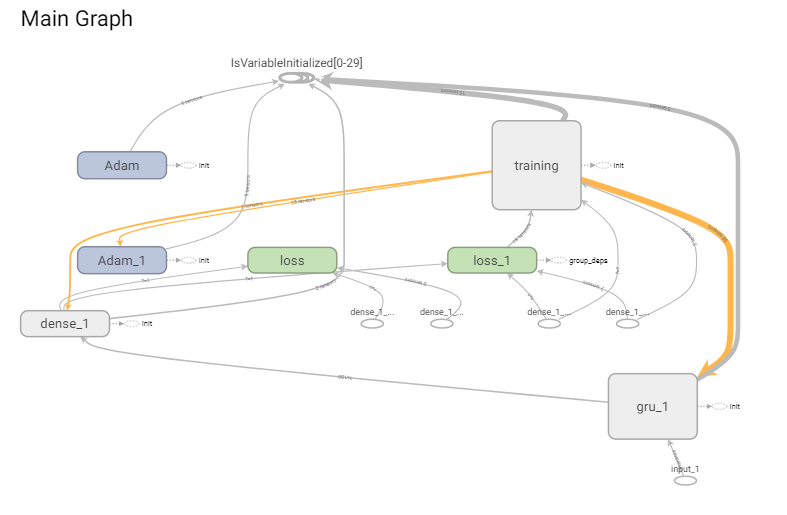

In [16]:
# Screenshot of model
Image(filename="./images/addition_using_gru.PNG")

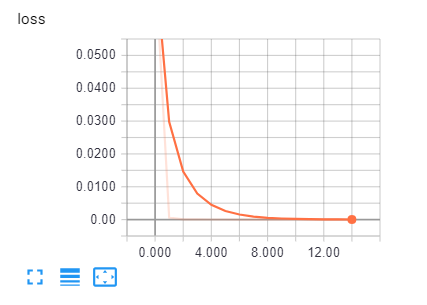

In [17]:
# Screenshot of loss plot
Image(filename="images/addition_using_gru_loss.PNG")